## уравнение простой линейной регрессии
* Аналитическое решение
* Градиентный спуск
* Стохастический градиентный спуск

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import pylab as pl
import random
import torch


%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

#### Таблица №1 «Условия примера»

In [125]:
x = [1,2,3,4,5]
y = [5.3,6.3,6.8,4.8,3.3]

In [126]:
# загрузим значения
table_zero = pd.read_csv('data_example.txt', header=0, sep='\t')

In [127]:
# посмотрим информацию о таблице и на саму таблицу
print (table_zero.info())
print ('********************************************')
print (table_zero)
print ('********************************************')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       5 non-null      int64  
 1   y       5 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 208.0 bytes
None
********************************************
   x    y
0  1  5.3
1  2  6.3
2  3  4.8
3  4  3.8
4  5  3.3
********************************************


In [128]:
# подготовим данные без использования NumPy

x_us = []
[x_us.append(float(i)) for i in table_zero['x']]
print (x_us)
print (type(x_us))
print ('********************************************')

[1.0, 2.0, 3.0, 4.0, 5.0]
<class 'list'>
********************************************


In [129]:
y_us = []
[y_us.append(float(i)) for i in table_zero['y']]
print (y_us)
print (type(y_us))
print ('********************************************')

[5.3, 6.3, 4.8, 3.8, 3.3]
<class 'list'>
********************************************


In [130]:
# подготовим данные с использованием NumPy

x_np = table_zero[['x']].values
print (x_np)
print (type(x_np))
print (x_np.shape)
print ('********************************************')

y_np = table_zero[['y']].values
print (y_np)
print (type(y_np))
print (y_np.shape)
print ('********************************************')


[[1]
 [2]
 [3]
 [4]
 [5]]
<class 'numpy.ndarray'>
(5, 1)
********************************************
[[5.3]
 [6.3]
 [4.8]
 [3.8]
 [3.3]]
<class 'numpy.ndarray'>
(5, 1)
********************************************


График №1 "Зависимость выручки от месяца года"


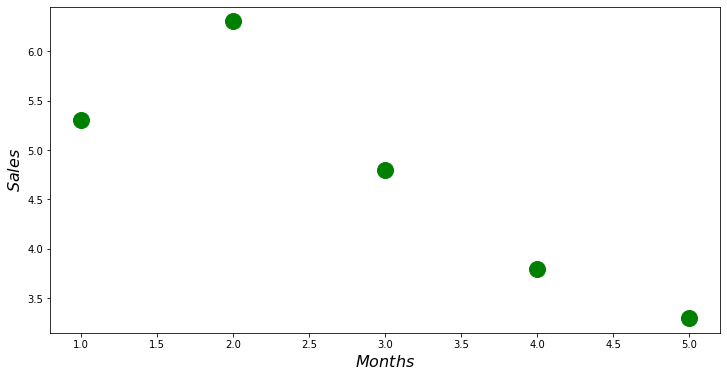

In [131]:
print ('График №1 "Зависимость выручки от месяца года"')

plt.plot(x_us,y_us,'o',color='green',markersize=16)
plt.xlabel('$Months$', size=16)
plt.ylabel('$Sales$', size=16)
plt.show()

## Аналитическое решение

In [132]:
# определим функцию для расчета коэффициентов a и b по правилу Крамера

def Kramer_method (x, y):
    
    # сумма значений (все месяца)
    sx = sum(x)
    
    # сумма истинных ответов (выручка за весь период)
    sy = sum(y)
    
    # сумма произведения значений на истинные ответы
    list_xy = []
    [list_xy.append(x[i]*y[i]) for i in range(len(x))]
    sxy = sum(list_xy)
    
    # сумма квадратов значений
    list_x_sq = []
    [list_x_sq.append(x[i]**2) for i in range(len(x))]
    sx_sq = sum(list_x_sq)
    
    # количество значений
    n = len(x)
    
    # общий определитель
    det = sx_sq*n - sx*sx
    
    # определитель по a
    det_a = sx_sq*sy - sx*sxy
    
    # искомый параметр a
    a = (det_a/det)
    
    # определитель по b
    det_b = sxy*n - sy*sx
    
    # искомый параметр b
    b = (det_b/det)
    
    # контрольные значения (прооверка)
    check1 = (n*b + a*sx - sy)
    check2 = (b*sx + a*sx_sq - sxy)
    
    return [round(a,4), round(b,4)]
     

In [133]:
# запустим функцию и запишем правильные ответы
ab_us = Kramer_method(x_us, y_us)
a_us = ab_us[0]
b_us = ab_us[1]


print ('\033[1m' + '\033[4m' + "Оптимальные значения коэффициентов a и b:"  + '\033[0m') 
print ('a =', a_us)
print ('b =', b_us)


Оптимальные значения коэффициентов a и b:
a = 6.65
b = -0.65


In [134]:
# определим функцию для подсчета суммы квадратов ошибок
   
def errors_sq_Kramer_method(answers,x,y):
    list_errors_sq = []
    for i in range(len(x)):
        err = ((answers[0] + answers[1]*x[i] - y[i])**2)
        list_errors_sq.append(err)
    return round(sum(list_errors_sq),4)

In [135]:
# запустим функцию и запишем значение ошибки
error_sq = errors_sq_Kramer_method(ab_us,x_us,y_us)
print ('\033[1m' + '\033[4m' + "Сумма квадратов отклонений" + '\033[0m')
print (error_sq)


Сумма квадратов отклонений
1.475


In [136]:
# определим функцию для формирования массива рассчетных значений выручки
def sales_count(ab, x, y):
    line_answers = []
    [line_answers.append(ab[0]+ab[1]*x[i]) for i in range(len(x))]
    return line_answers

Грфик№2 "Правильные и расчетные ответы"


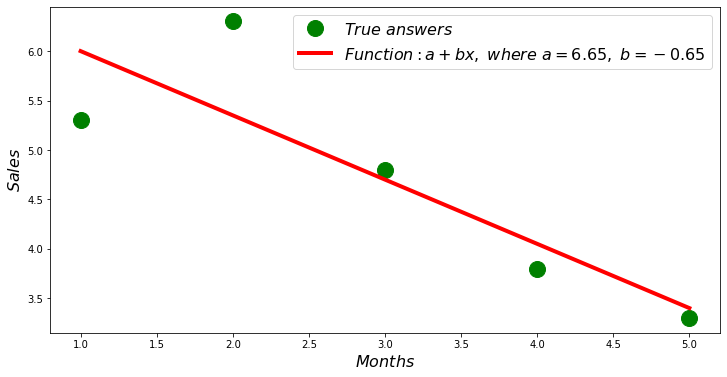

In [137]:
# построим графики
print ('Грфик№2 "Правильные и расчетные ответы"')
plt.plot(x_us,y_us,'o',color='green',markersize=16, label = '$True$ $answers$')
plt.plot(x_us, sales_count(ab_us,x_us,y_us), color='red',lw=4,
         label='$Function: a + bx,$ $where$ $a='+str(round(ab_us[0],2))+',$ $b='+str(round(ab_us[1],2))+'$')
plt.xlabel('$Months$', size=16)
plt.ylabel('$Sales$', size=16)
plt.legend(loc=1, prop={'size': 16})
plt.show()

График№3 "Отклонения по-месячно, %"


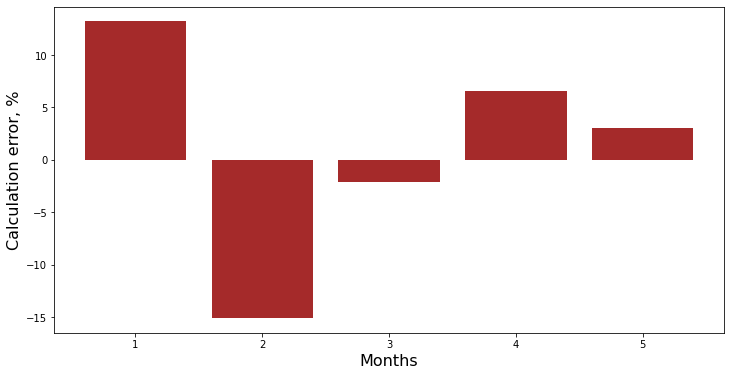

In [138]:
# определим функцию для формирования массива отклонений в процентах
def error_per_month(ab,x,y):
    sales_c = sales_count(ab,x,y)
    errors_percent = []
    for i in range(len(x)):
        errors_percent.append(100*(sales_c[i]-y[i])/y[i])
    return errors_percent

# построим график
print ('График№3 "Отклонения по-месячно, %"')
plt.gca().bar(x_us, error_per_month(ab_us,x_us,y_us), color='brown')
plt.xlabel('Months', size=16)
plt.ylabel('Calculation error, %', size=16)
plt.show()

In [139]:
# для начала добавим столбец с не изменяющимся значением в 1. 
# Данный столбец нужен для того, чтобы не обрабатывать отдельно коэффицент a
vector_1 = np.ones((x_np.shape[0],1))
x_np = table_zero[['x']].values # на всякий случай приведем в первичный формат вектор x_np
x_np = np.hstack((vector_1,x_np))

# проверим то, что все сделали правильно
print (vector_1[0:3])
print (x_np[0:3])
print ('***************************************')


[[1.]
 [1.]
 [1.]]
[[1. 1.]
 [1. 2.]
 [1. 3.]]
***************************************


In [140]:
# напишем функцию, которая определяет значения коэффициентов a и b с использованием псевдообратной матрицы

def pseudoinverse_matrix(X, y):
    # задаем явный формат матрицы признаков
    X = np.matrix(X)
    
    # определяем транспонированную матрицу
    XT = X.T
    
    # определяем квадратную матрицу
    XTX = XT*X
    
    # определяем псевдообратную матрицу
    inv = np.linalg.pinv(XTX)
    
    # задаем явный формат матрицы ответов
    y = np.matrix(y)
    
    # находим вектор весов
    return (inv*XT)*y
    
    
# запустим функцию
ab_np = pseudoinverse_matrix(x_np, y_np)
print (ab_np)
print ('***************************************')   
    

[[ 6.65]
 [-0.65]]
***************************************


In [204]:
# напишем функцию, которая использует для решения матричное уравнение

def matrix_equation(X,y):
    a = X.T @ X
    b = X.T @ y
    return np.linalg.solve(a,b)

# запустим функцию
ab_np = matrix_equation(x_np,y_np)
print (ab_np)

[[ 6.65]
 [-0.65]]


In [205]:
# напишем функцию, которая использует для решения матричное уравнение pytourch

def matrix_torch (X, y):
    
    a = torch.tensor(X).T @ torch.tensor(X)
    b = torch.tensor(X).T @ torch.tensor(y)
    
    return  torch.matmul(torch.linalg.inv(a), b)
        
# запустим функцию
ab_np = matrix_torch(x_np,y_np)
print (ab_np)
        

tensor([[ 6.6500],
        [-0.6500]], dtype=torch.float64)


In [144]:
torch.tensor(x_np)

tensor([[1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.]], dtype=torch.float64)

In [223]:
x = torch.tensor(((1.,1.,1.,1.,1.,),(1.,2.,3.,4.,5.),))
y = torch.tensor(((5.3,6.3,4.8,3.8,3.3),(5.3,6.3,4.8,3.8,3.3),(5.3,2.3,4.8,3.8,3.3)))
#z = torch.tensor((5.3,6.3,6.8,4.8,3.3)))
x.size(), y.size()

(torch.Size([2, 5]), torch.Size([3, 5]))

In [224]:
a = x @ x.T
b =  y @ x.T

In [225]:
b @ torch.linalg.inv(a)

tensor([[ 6.6500, -0.6500],
        [ 6.6500, -0.6500],
        [ 4.6500, -0.2500]])

In [226]:
x_in = torch.linspace(1,10,5)
y_in = x_in * 2 + 10

In [227]:
x_in

tensor([ 1.0000,  3.2500,  5.5000,  7.7500, 10.0000])

In [228]:
y_in

tensor([12.0000, 16.5000, 21.0000, 25.5000, 30.0000])

In [241]:
k = [i for i in torch.rand(5)]

In [247]:
torch.rand(2,10)

tensor([[0.2545, 0.9658, 0.6380, 0.2189, 0.6183, 0.6682, 0.7769, 0.0787, 0.5475,
         0.9513],
        [0.4349, 0.0141, 0.8956, 0.2792, 0.7400, 0.1270, 0.3484, 0.6238, 0.9735,
         0.0037]])